In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
claims =pd.read_csv("claims.csv")
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [3]:
cust_data = pd.read_csv("cust_demographics.csv")
cust_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [4]:
cust_claims =pd.merge(left=cust_data,right =claims,left_on ="CUST_ID",right_on="customer_id",how="inner")
cust_claims.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [5]:
cust_claims.drop(columns = "customer_id",axis =1,inplace=True)
cust_claims.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [6]:
#Question 2
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   incident_cause       1085 non-null   object 
 8   claim_date           1085 non-null   object 
 9   claim_area           1085 non-null   object 
 10  police_report        1085 non-null   object 
 11  claim_type           1085 non-null   object 
 12  claim_amount         1020 non-null   object 
 13  total_policy_claims  1075 non-null   float64
 14  fraudulent           1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [7]:
cust_claims['claim_date']=pd.to_datetime(cust_claims['claim_date'])
cust_claims['DateOfBirth'] = pd.to_datetime(cust_claims['DateOfBirth'])
cust_claims['DateOfBirth']=np.where(cust_claims['DateOfBirth'].dt.year>2020,
                                   cust_claims['DateOfBirth']-pd.DateOffset(years=100),cust_claims['DateOfBirth'])

In [8]:
cust_claims.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No


In [9]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   object        
 13  total_policy_claims  1075 non-nul

In [10]:
cust_claims.claim_amount = cust_claims.claim_amount.str.replace('$','').astype('float')

C:\Users\gudla\AppData\Local\Temp\ipykernel_20472\3163068560.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claims.claim_amount = cust_claims.claim_amount.str.replace('$','').astype('float')


In [11]:
cust_claims.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


In [12]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   float64       
 13  total_policy_claims  1075 non-nul

In [13]:
#Question 4
cust_claims["unreported_claims"]=np.where(cust_claims.police_report =="Unknown",1,0)
cust_claims.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_claims
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0


In [14]:
#Question 5
cust_claims= cust_claims.drop_duplicates(subset=["CUST_ID"])
cust_claims.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_claims
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0


In [15]:
#Question 6
cust_claims.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
unreported_claims       0
dtype: int64

In [16]:
cust_claims["claim_amount"]=cust_claims["claim_amount"].replace(np.NaN,cust_claims['claim_amount'].mean())
cust_claims["claim_amount"].isna().sum()

0

In [17]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1078 non-null   int64         
 1   gender               1078 non-null   object        
 2   DateOfBirth          1078 non-null   datetime64[ns]
 3   State                1078 non-null   object        
 4   Contact              1078 non-null   object        
 5   Segment              1078 non-null   object        
 6   claim_id             1078 non-null   int64         
 7   incident_cause       1078 non-null   object        
 8   claim_date           1078 non-null   datetime64[ns]
 9   claim_area           1078 non-null   object        
 10  police_report        1078 non-null   object        
 11  claim_type           1078 non-null   object        
 12  claim_amount         1078 non-null   float64       
 13  total_policy_claims  1068 non-nul

In [18]:
cust_claims["total_policy_claims"]=cust_claims["total_policy_claims"].fillna(cust_claims["total_policy_claims"].mode()[0])

In [19]:
cust_claims["total_policy_claims"]=cust_claims["total_policy_claims"].astype(str)

In [20]:
cust_claims["total_policy_claims"].isna().sum()

0

In [21]:
cust_claims.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
unreported_claims      0
dtype: int64

In [22]:
#Question 7
cust_claims["age"] = (pd.Timestamp("now")-cust_claims["DateOfBirth"]).astype('<m8[Y]')
cust_claims.age.head()

0    44.0
1    53.0
2    38.0
4    36.0
6    45.0
Name: age, dtype: float64

In [23]:
def age_group (x):
    if x.age<18:
        return 'children'
    elif x.age < 30:
        return "youth"
    elif x.age <=60:
        return "adult"
    else :
        return "senior"

In [24]:
cust_claims["age_group"] = cust_claims.apply(age_group,axis=1)
cust_claims.head(15)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_claims,age,age_group
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,44.0,adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1,53.0,adult
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0,38.0,adult
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0,36.0,adult
6,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0,45.0,adult
8,21831191,Male,1977-05-17,NH,419-712-8513,Gold,24050443,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,0,45.0,adult
10,18401412,Male,1999-03-02,AR,752-398-2914,Gold,12878692,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,0,23.0,youth
11,73486606,Male,1999-10-25,AK,256-968-9172,Silver,27026412,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,0,23.0,youth
12,32813689,Male,1993-10-12,ID,142-324-7481,Silver,43908336,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,1,29.0,youth
13,33507197,Female,1966-09-09,RI,165-519-4583,Gold,63246959,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,0,56.0,adult


In [25]:
#Question 8
round(cust_claims.groupby("Segment")[["claim_amount"]].mean(),2)

,claim_amount
Segment,
Gold,12756.48
Platinum,12369.30
Silver,12269.43


In [26]:
#Question 9
round(cust_claims.loc[cust_claims.claim_date<"2018-9-10",:].groupby("incident_cause")[["claim_amount"]].sum(),2)

,claim_amount
incident_cause,
Crime,724462.49
Driver error,3264285.98
Natural causes,1312705.99
Other causes,3725038.47
Other driver error,3318806.48


In [27]:
#Question 11
gender_seg =pd.pivot_table(cust_claims,values ="claim_amount",index="gender",columns ="Segment")
gender_seg

Segment,Gold,Platinum,Silver
gender,,,
Female,12337.798168,12277.220154,11647.598041
Male,13114.452404,12475.092191,12823.311354


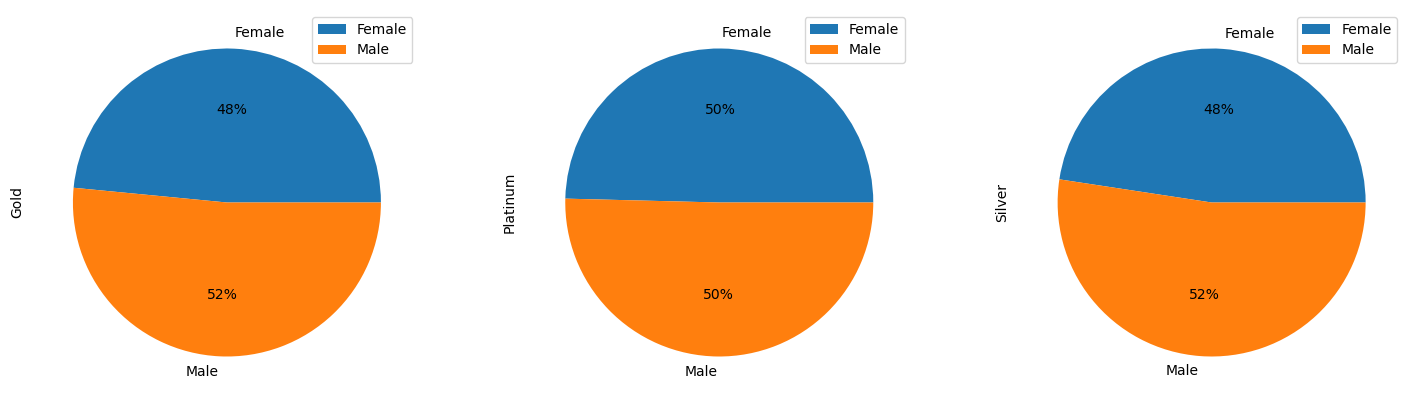

In [28]:
#Question 11
gender_seg.plot(kind = "pie",autopct="%1.0f%%",subplots=True,figsize=(18,5))
plt.show()

In [29]:
#Question 12
d1= cust_claims.loc[cust_claims.incident_cause.str.lower().str.contains("driver")
                   ,:].groupby("gender")[["gender"]].count().add_prefix("Countof_").reset_index()
d1

,gender,Countof_gender
0,Female,221
1,Male,280


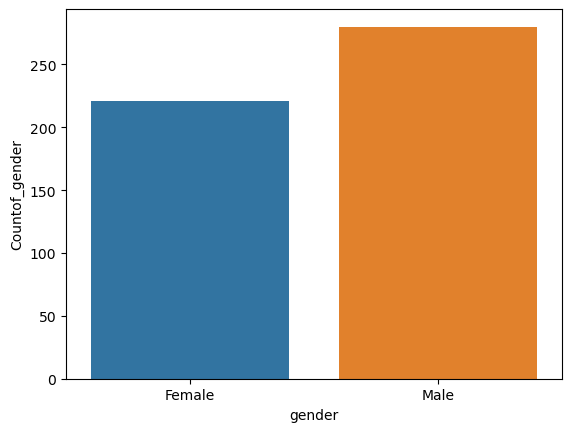

In [30]:
sns.barplot(x="gender",y="Countof_gender",data=d1)
plt.show()

In [31]:
#Question 13
fraud_age = cust_claims.groupby("age_group")[["fraudulent"]].count().reset_index()
fraud_age

,age_group,fraudulent
0,adult,820
1,senior,54
2,youth,204


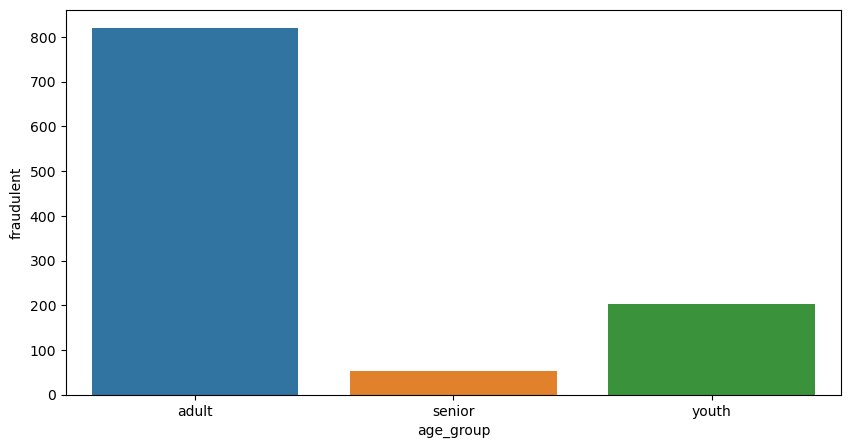

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x = "age_group",y = "fraudulent",data = fraud_age)
plt.show()

In [33]:
#Question 14
cust_claims["month"]= cust_claims["claim_date"].apply(lambda x: pd.Timestamp.strftime(x,format="%B"))


In [34]:
monthly_amount =round(cust_claims.groupby("month")[["claim_amount"]].sum().reset_index(),2)
monthly_amount

,month,claim_amount
0,April,1276071.50
1,August,911203.50
2,December,696701.50
3,February,1133106.99
4,January,1332011.99
5,July,1379034.99
6,June,1276332.99
7,March,1320093.99
8,May,1114211.49
9,November,601125.00


In [35]:
monthly_amount["New_month"]=pd.DatetimeIndex(pd.to_datetime(monthly_amount["month"],format ="%B")).month
monthly_amount = monthly_amount.sort_values(by="New_month")
monthly_amount

,month,claim_amount,New_month
4,January,1332011.99,1
3,February,1133106.99,2
7,March,1320093.99,3
0,April,1276071.50,4
8,May,1114211.49,5
6,June,1276332.99,6
5,July,1379034.99,7
1,August,911203.50,8
11,September,980647.99,9
10,October,1422655.49,10


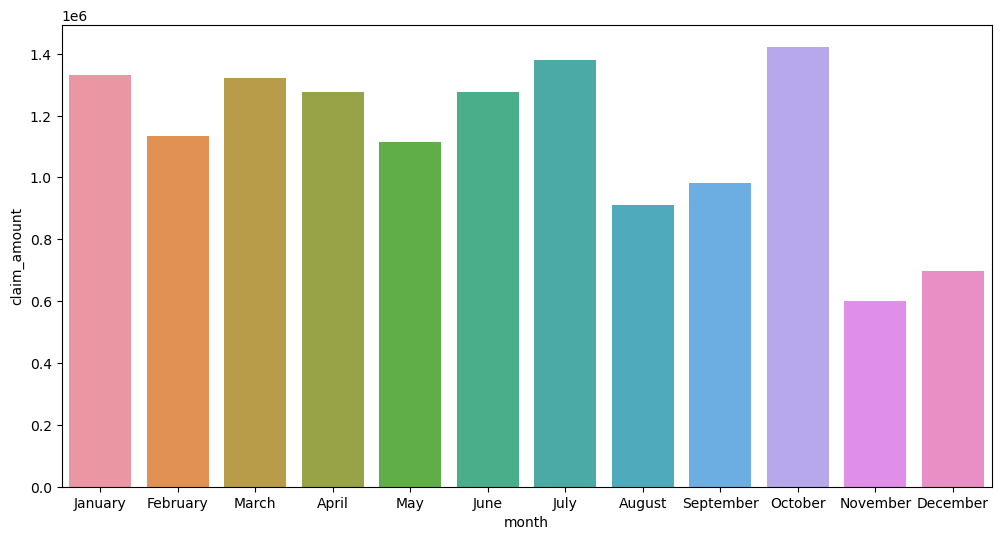

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_amount,x="month",y="claim_amount")
plt.show()

In [37]:
#Question 15
gender_age =round(pd.pivot_table(data = cust_claims,index =["age_group",
            "fraudulent"],columns ="gender",values ="claim_amount").reset_index(),2)
gender_age.set_index("age_group",inplace=True)
gender_age

gender,fraudulent,Female,Male
age_group,,,
adult,No,12095.20,12060.19
adult,Yes,12105.83,15970.78
senior,No,15924.58,13670.85
senior,Yes,4387.89,28232.50
youth,No,12889.78,12280.15
youth,Yes,9214.55,7797.89


In [38]:
fraudulent_claim =gender_age.loc[gender_age.fraudulent =="Yes"]
fraudulent_claim


gender,fraudulent,Female,Male
age_group,,,
adult,Yes,12105.83,15970.78
senior,Yes,4387.89,28232.50
youth,Yes,9214.55,7797.89


In [39]:
non_fraudulent_claim = gender_age.loc[gender_age.fraudulent =="No"]
non_fraudulent_claim

gender,fraudulent,Female,Male
age_group,,,
adult,No,12095.20,12060.19
senior,No,15924.58,13670.85
youth,No,12889.78,12280.15


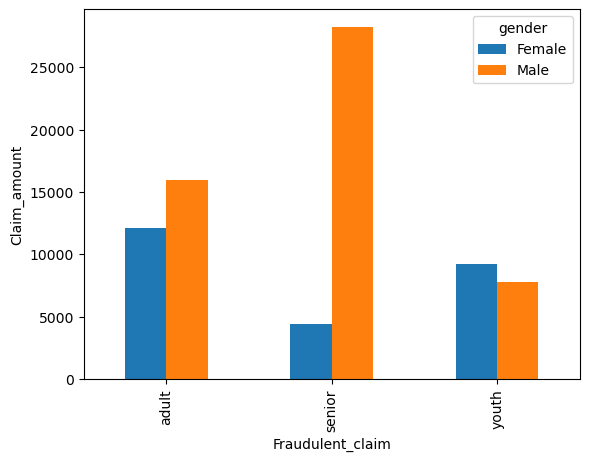

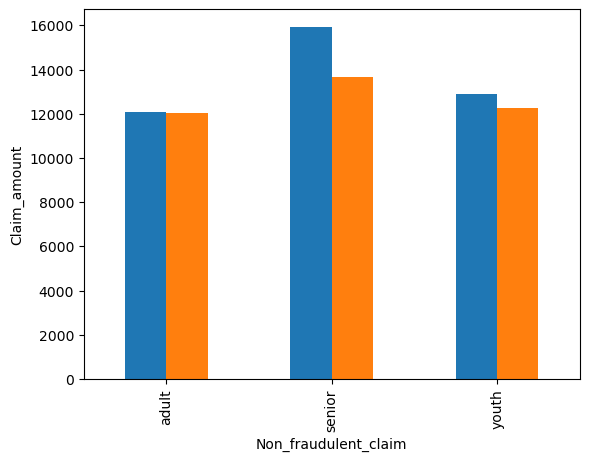

In [40]:
fraudulent_claim.plot(kind="bar")
plt.xlabel("Fraudulent_claim")
plt.ylabel("Claim_amount")

non_fraudulent_claim.plot(kind ="bar",legend =False)
plt.xlabel("Non_fraudulent_claim")
plt.ylabel("Claim_amount")

plt.show()

In [41]:
# Question 16
cust_claims.gender.unique()

array(['Female', 'Male'], dtype=object)

In [42]:
male = cust_claims.loc[cust_claims.gender == "Male","claim_amount"]
female = cust_claims.loc[cust_claims.gender =="Female","claim_amount"]
print("mean of male claim amount:",round(male.mean(),1),
      "|mean of female claim amount:",round(female.mean(),1))

mean of male claim amount: 12822.8 |mean of female claim amount: 12102.1


In [43]:
print(stats.ttest_ind(male,female))

Ttest_indResult(statistic=0.8848703612768548, pvalue=0.3764242430541366)


In [44]:
# Question 17
obs =pd.crosstab(cust_claims.age_group,cust_claims.Segment)
print("observed frequency table","\n",obs)
# Ho: No relationship between age category and segment,independent
# Ha:Relationship between age category and segment,dependent

# CI : 95%
# P value : 1-CI =0.05
# rejection rule : if p value is low;null will go,if P value is high; null will fly
# perform the test : chi square test
print("\n\n", "expected frequency table","\n",
     pd.DataFrame(stats.chi2_contingency(obs)[3]).round(0))
stats.chi2_contingency(obs)

observed frequency table 
 Segment    Gold  Platinum  Silver
age_group                        
adult       284       274     262
senior       18        18      18
youth        69        69      66


 expected frequency table 
        0      1      2
0  282.0  275.0  263.0
1   19.0   18.0   17.0
2   70.0   68.0   65.0


(0.09440821083768319,
 0.998920333823453,
 4,
 array([[282.20779221, 274.60111317, 263.19109462],
        [ 18.58441558,  18.08348794,  17.33209647],
        [ 70.20779221,  68.31539889,  65.47680891]]))

In [45]:
#Question 18
print("mean of sample claim amount :", round(cust_claims.claim_amount.mean(),1))

mean of sample claim amount : 12470.5


In [46]:
# Ho : claim_amount <= 10000
#Ha : claim_amount >10000
# CI : 95%
# p value : 1-CI= 0.05
# rejection rule:if p is low;null will go,if p is high;null will fly
#perform the T-test:
print(stats.ttest_1samp(cust_claims.claim_amount,10000))

Ttest_1sampResult(statistic=6.068796577191385, pvalue=1.7827316562159517e-09)


In [47]:
# Question 19
cust_claims.age_group.unique()

array(['adult', 'youth', 'senior'], dtype=object)

In [48]:
cust_claims.age_group.unique()
var = "claim_amount"
s1 = cust_claims.loc[cust_claims.age_group == "adult",var]
s2 = cust_claims.loc[cust_claims.age_group == "youth",var]
s3 = cust_claims.loc[cust_claims.age_group == "senior",var]
print("mean of s1:",round(s1.mean(),1),
         "|    mean of s2:",round(s2.mean(),1),
               " | mean Of s3:", round(s3.mean(),1) )

mean of s1: 12555.4 |    mean of s2: 11808.2  | mean Of s3: 13683.9


In [49]:
# Ho:samples are from same population
# Ha : samples are from different population
# CI : 95%
# p value : 1-CI =0.05
#rejection rule : if p is low ; null will go,if p is high; null will fly
 # perform the test : ANOVA test
print(stats.f_oneway(s1,s2,s3))

F_onewayResult(statistic=0.48909274480626286, pvalue=0.6133188342240958)


In [50]:
# Question 20
cust_claims.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported_claims,age,age_group,month
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,44.0,adult,November
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1,53.0,adult,October
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0,38.0,adult,February
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0,36.0,adult,June
6,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0,45.0,adult,January


In [51]:
# Ho: No correlation between the total number of policy claims and the claimed amount,independent
# Ha: the total number of policy claims and the claimed amount are related,dependent

#CI : 95%
# p value : 1-CI =0.05
# rejection rule : if the P value is low;null will go,if p value is high;null will fly
#perform the test : correlation test(SpermanrR test)
print(stats.spearmanr(cust_claims.claim_amount,cust_claims.total_policy_claims))

SpearmanrResult(correlation=0.008526490432594132, pvalue=0.7797615505440485)


C:\Users\gudla\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
